In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def addXGBClsfPred(X,y):
    from xgboost import XGBClassifier
    xgboost = XGBClassifier(n_estimators=100,learning_rate=0.1,reg_alpha=8)
    xgboost.fit(X, y)
    X['xgbPred']= xgboost.predict(X_test)
    
    return X
    
    
    

In [3]:
X= pd.read_pickle('../Model Fitting Files/X_fl_datetime_standard', compression='gzip')
X['month'] = pd.DatetimeIndex(pd.to_datetime(X['fl_date'],
                        infer_datetime_format = True)).month
X['dayWeek'] = pd.DatetimeIndex(pd.to_datetime(X['fl_date'],
                        infer_datetime_format = True)).dayofweek
X.drop(columns='fl_date', inplace=True)
X

,crs_dep_timeFT,crs_arr_timeFT,crs_elapsed_timeFT,distanceFT,op_unique_carrier,origin,dest,month,dayWeek
0,0.404950,0.475464,-0.252310,-0.371468,0.538777,1.766642,-0.046907,4,0
1,-1.030286,-1.074137,-0.808416,-0.651979,-0.541576,-1.089924,-0.722955,7,6
2,-0.825252,0.088064,0.706974,0.748875,0.484104,-1.104809,-0.330836,4,1
3,0.609983,0.475464,-0.794514,-0.889988,0.484104,0.018107,0.555854,11,2
4,-0.005118,0.088064,-0.474752,-0.597577,0.210159,-0.329730,1.621178,10,5
...,...,...,...,...,...,...,...,...,...
99995,0.404950,0.281764,-0.808416,-0.704681,-0.541576,-0.861272,0.260061,9,1
99996,1.635151,-2.817438,-0.224504,-0.087557,0.448690,1.766642,3.889518,10,0
99997,1.020050,1.250264,-0.599876,-0.388469,1.202815,-0.065834,0.349519,1,1
99998,0.815017,0.862864,-0.766708,-0.925690,0.569946,0.513858,-1.006962,6,1


In [4]:
#X= pd.read_csv('../Data Prep Files/X.csv', index_col=0)
ydf= pd.read_pickle('../Model Fitting Files/y', compression='gzip')
ydf

0        59.0
1       -20.0
2        -1.0
3       -18.0
4       -15.0
         ... 
99995    -6.0
99996    -9.0
99997   -18.0
99998   -12.0
99999    -1.0
Name: arr_delay, Length: 98047, dtype: float64

In [5]:
ydf.describe()

count    98047.000000
mean         5.309199
std         49.794934
min        -73.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       2973.000000
Name: arr_delay, dtype: float64

<AxesSubplot:>

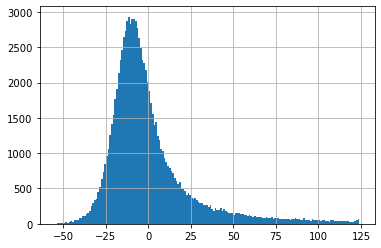

In [6]:
ydf.hist(bins=[-55+1*i for i in range(180)])

In [40]:
ydf[ydf.between(-50, 125) ]

0        59.0
1       -20.0
2        -1.0
3       -18.0
4       -15.0
         ... 
99995    -6.0
99996    -9.0
99997   -18.0
99998   -12.0
99999    -1.0
Name: arr_delay, Length: 95658, dtype: float64

In [43]:
[-55+1*i for i in range(180)]

[-55,
 -54,
 -53,
 -52,
 -51,
 -50,
 -49,
 -48,
 -47,
 -46,
 -45,
 -44,
 -43,
 -42,
 -41,
 -40,
 -39,
 -38,
 -37,
 -36,
 -35,
 -34,
 -33,
 -32,
 -31,
 -30,
 -29,
 -28,
 -27,
 -26,
 -25,
 -24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124]

In [51]:
import matplotlib.pyplot as plt

C:\Users\FBI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


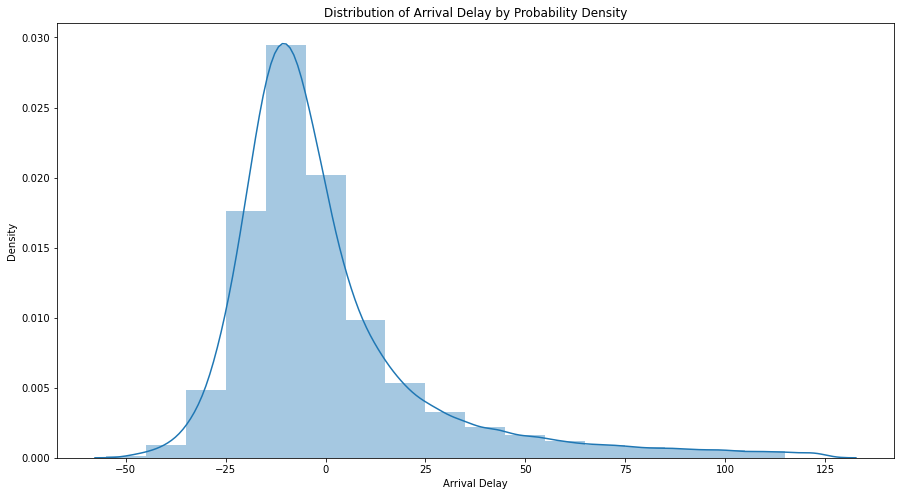

In [61]:
sb = pd.Series(ydf[ydf.between(-50, 125) ], name="Arrival Delay")

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.distplot(sb, bins=[-55+10*i for i in range(18)]).set_title('Distribution of Arrival Delay by Probability Density')

In [7]:
X

,crs_dep_timeFT,crs_arr_timeFT,crs_elapsed_timeFT,distanceFT,op_unique_carrier,origin,dest,month,dayWeek
0,0.404950,0.475464,-0.252310,-0.371468,0.538777,1.766642,-0.046907,4,0
1,-1.030286,-1.074137,-0.808416,-0.651979,-0.541576,-1.089924,-0.722955,7,6
2,-0.825252,0.088064,0.706974,0.748875,0.484104,-1.104809,-0.330836,4,1
3,0.609983,0.475464,-0.794514,-0.889988,0.484104,0.018107,0.555854,11,2
4,-0.005118,0.088064,-0.474752,-0.597577,0.210159,-0.329730,1.621178,10,5
...,...,...,...,...,...,...,...,...,...
99995,0.404950,0.281764,-0.808416,-0.704681,-0.541576,-0.861272,0.260061,9,1
99996,1.635151,-2.817438,-0.224504,-0.087557,0.448690,1.766642,3.889518,10,0
99997,1.020050,1.250264,-0.599876,-0.388469,1.202815,-0.065834,0.349519,1,1
99998,0.815017,0.862864,-0.766708,-0.925690,0.569946,0.513858,-1.006962,6,1


In [8]:
ydf

0        59.0
1       -20.0
2        -1.0
3       -18.0
4       -15.0
         ... 
99995    -6.0
99996    -9.0
99997   -18.0
99998   -12.0
99999    -1.0
Name: arr_delay, Length: 98047, dtype: float64

In [9]:
#ydf['y_sign'].isnull().sum()
def split_half (y):
    #return ((y<8) and (y>-15))*1
    return (y<0)*1
    #return (y>0) *1
    #return (y>8)*1

# def set_bins(y):
#     return 

y=pd.cut(ydf, bins=[-100,0,1000000], labels=False)

In [10]:
ydf

0        59.0
1       -20.0
2        -1.0
3       -18.0
4       -15.0
         ... 
99995    -6.0
99996    -9.0
99997   -18.0
99998   -12.0
99999    -1.0
Name: arr_delay, Length: 98047, dtype: float64

In [11]:
ydf.apply(split_half)

0        0
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: arr_delay, Length: 98047, dtype: int64

In [12]:
#df=pd.concat([X,pd.cut(ydf, bins=[-100,-7,10000000], labels=False)], axis=1).dropna()
df=pd.concat([X,ydf.apply(split_half)], axis=1).dropna()
X=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [13]:
y

0        0
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: arr_delay, Length: 98047, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# y_pred= gnb.predict(X_test)

from xgboost import XGBClassifier
xgboost = XGBClassifier()#n_estimators=100,learning_rate=0.1,reg_alpha=8)
xgboost.fit(X_train, y_train)
y_pred= xgboost.predict(X_test)

C:\Users\FBI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
analysisDF=pd.DataFrame(xgboost.predict_proba(X_test), index=y_test.index)

In [17]:
analysisDF

,0,1
38092,0.221292,0.778708
47992,0.488545,0.511455
21508,0.347490,0.652510
85880,0.315993,0.684007
20230,0.656388,0.343612
...,...,...
5799,0.405755,0.594245
45985,0.321081,0.678919
6656,0.454115,0.545885
38057,0.336772,0.663228


In [18]:
analysisDF.loc[analysisDF[0]>0.8]

,0,1
40779,0.829378,0.170622
77963,0.843262,0.156738
60411,0.811580,0.188420
55856,0.835520,0.164480
67385,0.844981,0.155019
...,...,...
41320,0.834421,0.165579
18039,0.845876,0.154124
4440,0.928483,0.071517
47184,0.820312,0.179688


In [19]:
analysisDF['yTrue']=y_test
analysisDF['yPred']=y_pred

In [20]:
# from sklearn import metrics 
# print(metrics.r2_score(y_test, y_pred))
print(xgboost.score(X_train,y_train))
print(xgboost.score(X_test,y_test))

0.6963952675136962
0.6372938976712562


In [21]:
print

<function print>

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score,recall_score
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))#, average='binary'))
print(recall_score(y_test,y_pred))#, average='binary'))

[[ 2353  8396]
 [ 2273 16393]]
0.6613013836782444
0.8782277938497803


In [23]:
len(y_pred)

29415

In [24]:
print(accuracy_score(y_test,y_pred))

0.6372938976712562


In [25]:
y_test.index

Int64Index([38092, 47992, 21508, 85880, 20230, 98850, 20342, 33565, 93140,
            18088,
            ...
            81837, 53295, 52959, 75984, 58123,  5799, 45985,  6656, 38057,
            14390],
           dtype='int64', length=29415)

In [26]:
tp=[]
tn=[]
fn=[]
fp=[]
for i,j,k in zip(y_test,y_pred, y_test.index):
    if i==0:
        if j==0:
            tn.append(ydf[k])
        else:
            fp.append(ydf[k])
    else:
        if j==0:
            fn.append(ydf[k])
        else:
            tp.append(ydf[k])
            

In [27]:
len(tp), len(tn), len(fn), len(fp)

(16393, 2353, 2273, 8396)

In [28]:
(pd.Series(tp).describe(),
pd.Series(tn).describe(),
pd.Series(fn).describe(),
pd.Series(fp).describe())

(count    16393.000000
 mean       -13.653755
 std          8.441755
 min        -71.000000
 25%        -19.000000
 50%        -13.000000
 75%         -7.000000
 max         -1.000000
 dtype: float64,
 count    2353.000000
 mean       42.508287
 std        67.058705
 min         0.000000
 25%         8.000000
 50%        21.000000
 75%        52.000000
 max      1128.000000
 dtype: float64,
 count    2273.000000
 mean      -12.820062
 std         8.331686
 min       -46.000000
 25%       -18.000000
 50%       -12.000000
 75%        -6.000000
 max        -1.000000
 dtype: float64,
 count    8396.000000
 mean       36.832658
 std        72.121977
 min         0.000000
 25%         5.000000
 50%        14.000000
 75%        39.000000
 max      1174.000000
 dtype: float64)

In [29]:
pd.Series(tp+fp).describe()

count    24789.000000
mean         3.445924
std         48.781963
min        -71.000000
25%        -15.000000
50%         -7.000000
75%          5.000000
max       1174.000000
dtype: float64

In [30]:
pd.Series(tn+fn).describe()

count    4626.000000
mean       15.322525
std        55.553437
min       -46.000000
25%       -11.000000
50%         0.000000
75%        22.000000
max      1128.000000
dtype: float64

In [31]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred, average='binary')

0.6613013836782444

In [32]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred, average='binary')

0.8782277938497803